In [24]:
# Esercizio 1
# Definire una funzione  che prende due dizionari con chiavi a piacere e valori degli interi e ritorna un nuovo
# dizionario che ha entrambe le chiavi dei dizionari, se una chiave è presente in entrambi i dizionari
# effettua le somme dei valori. 
# es. {"ciccio":25, "p": 12} {"ciccio":2, "q":7} -> { "ciccio": 27, "p":12, "q":7}  

def merge(diz1,diz2):
    diz_merge = {}
    for key, value in  diz1.items():
        diz_merge[key] = value
    for key, value in  diz2.items():
        diz_merge[key]= diz_merge.get(key,0)+ value
    return diz_merge

def merge_2(diz1,diz2):
    diz_merge = {}
    for key, value in  tuple(diz1.items()) + tuple(diz2.items()) :
        diz_merge[key] =  diz_merge.get(key,0)+ value
    return diz_merge

merge_2({"ciccio":25, "p": 12} ,{"ciccio":2, "q":7})


{'ciccio': 27, 'p': 12, 'q': 7}

In [15]:
# Esercizio 2
# Definire una funzione che prende come input una frase (insieme di stringhe intervallate da uno spazio)
# e ritorna un dizionario che ha come chiavi delle lettere e come valori la parola in frase di lunghezza massima 
# che inizia proprio con quella lettera..
# Esempio: "mela pera macchina parmigiano console pittore piadina posizione carteggio foca" restituisce: 
# {"m": "macchina", "p": "posizione", "c": "carteggio", "f":"foca"}
# a parità di lunghezza si preferisce la prima parola incontrata. 

def parole_lunghe(frase):
    diz = {}
    parole = frase.split()
    sostituzione = lambda x,y : x if len(x)>len(y) else y 
    for p in parole:
        diz[p[0]]=sostituzione(diz.get(p[0],""),p)
    return diz
parole_lunghe("mela pera macchina parmigiano console pittore piadina posizione carteggio foca")        

{'m': 'macchina', 'p': 'parmigiano', 'c': 'carteggio', 'f': 'foca'}

In [20]:
# Esercizio 3
# definire una funzione che prende in input una lista di numeri interi e ritorna una lista di stringhe, 
# corrispondenti ai numeri scritti in italiano
# es. [1,0,7,9,8] -> ["uno","zero","sette","nove","otto"] 
def translate(numeri):
    diz = dict(zip(range(0,10),["zero","uno","due","tre","quattro","cinque","sei","sette","otto","nove"]))
    return [ diz[n] for n in numeri]

translate([1,0,7,9,8])

['uno', 'zero', 'sette', 'nove', 'otto']

In [102]:
# Esercizio 4 
# definite un generatore di numeri primi
def not_primo(numero, primi):
    for p in primi:
        if(numero%p==0): # numero è divisibile per p 
            return True
    return False

def primi():
    i = 2
    primi = set() 
    while(True):
        while(not_primo(i,primi)):
            i = i+1
        primi.add(i)
        yield i

generatore_primi = primi()
for i in range(100):
    print(next(generatore_primi), end = " ")

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 101 103 107 109 113 127 131 137 139 149 151 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251 257 263 269 271 277 281 283 293 307 311 313 317 331 337 347 349 353 359 367 373 379 383 389 397 401 409 419 421 431 433 439 443 449 457 461 463 467 479 487 491 499 503 509 521 523 541 

## Lettura e scrittura su file

In [ ]:
file=open('file/provaScrittura2.txt','wt') # apro un file in modalità scrittura (w) testuale (t)
file.write("ciao\n")   # scrivo sul file ciao e vado a capo con \n
file.write("come stai?\n") 
file.close()  # chiudo e salvo il file

In [ ]:
file=open('file/provaScrittura.txt','rt')# apro un file in modalità lettura
contenuto = file.read() # contenuto è una stringa unica...
righe = contenuto.split("\n") # uso split per creare una lista con le righe del testo
file.close()            # esco dalla lettura del file e lo chiudo
print(righe)

In [ ]:
file=open('file/provaScrittura.txt','r')# apro un file in modalità lettura, la t è di default!
righe = file.readlines() # readlines crea direttamente una lista con le righe del testo
file.close()
print(righe)

In [ ]:
file=open('file/provaScrittura.txt','r')# apro un file in modalità lettura
# file=open('provaScrittura.txt') posso omettere la r che è il valore di default per la modalità
print(file.readline()) # readline legge una riga del testo
print(file.readline()) # se lo chiamo una seconda volta legge la riga successiva e così via
file.close()

In [ ]:
# posso evitare di chiudere un file usando il comando with. Il file viene chiuso automaticamente 
# appena la computazione esce dallo scope del with!!! 
with open('file/provaScrittura.txt') as file:
    print(file.readlines())

## Pickle
#### Tutto quello che scrivo e leggo da un file è un stringa, come faccio a salvare dei dati nel formato originale? 


In [ ]:
# Possiamo usare pickle per serializzare un oggetto!
# serializziamo l'oggetto in byte e salviamolo su un file
import pickle

dizionario = {"nome":"mario"}
with open('storage.txt','wb') as file:    #uso la b che sta per byte!
    pickle.dump(dizionario,file)

In [ ]:
# per caricare il contenuto dello storage.... 
file = open("storage.txt","rb")
diz = pickle.load(file)  # usare la b!
print(diz)

#### E se devo salvare più di un oggetto?


In [ ]:
import pickle

dizionario = {"nome":"mario"}
lista = ["a",12,32.7]
valore = 12

with open('storage2.txt','wb') as file:    # uso la b che sta per byte!
    pickle.dump(dizionario,file)           # dump salva il contenuto in append al file 
    pickle.dump(lista,file)
    pickle.dump(valore,file)

with open('storage2.txt','rb') as file:    #uso la b che sta per byte!
    diz = pickle.load(file)       
    lis = pickle.load(file)
    val = pickle.load(file)

print(diz)
print(lis) 
print(val)

In [25]:
# in file/iris.data abbiamo un file contenente dei dati...

with open("file/iris.data") as file: 
    elements = [ row.replace("\n","").split(",") for row in file.readlines()] #
print(elements[0])
print(elements[1])
print(elements[2])
# i primi 4 elementi sono dei numeri. Come faccio a convertirli da str a float?

for element in elements: 
    for i in range(len(element)-1):
        element[i] = float(element[i])

print(elements[0])
print(elements[1])
print(elements[2])

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']
['4.9', '3.0', '1.4', '0.2', 'Iris-setosa']
['4.7', '3.2', '1.3', '0.2', 'Iris-setosa']
[5.1, 3.5, 1.4, 0.2, 'Iris-setosa']
[4.9, 3.0, 1.4, 0.2, 'Iris-setosa']
[4.7, 3.2, 1.3, 0.2, 'Iris-setosa']


### [Numpy](https://numpy.org/)

#### Creo un array

In [2]:
import numpy as np

a = np.array([1, 2, 3])   # Creo un array
print(type(a))            # 
print(a.shape)            # Stampo la dimensione, è una tupla
print(a[0], a[1], a[2])   # Accedere agli elementi
a[0] = 5                  # Modificare un elemento

print(a)                  

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


#### Creo una matrice (array - 2d)

In [79]:
b = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(b)
print(b.shape)                     # 
print(b[0, 0], b[0, 1], b[1, 0])   # Accedo agli elementi

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)
1 2 4


#### Slicing: accedere agli elementi di una colonna, riga, etc.

In [12]:
colonna_indice_0 = b[:,0]
print(colonna_indice_0)
riga_indice_1 = b[1,:]
print(riga_indice_1)

[1 4 7]
[4 5 6]


In [11]:
# Esercizio come identifichiamo la matrice [[5,6],[8,9]] usando lo slicing?

#### Boolean indexing

In [100]:
b = np.array([[1,2,25],[14,5,16],[2,8,19]])
print(b)
print()
print(b>2) # trova gli elementi delle matrice che sono maggiorni di 2. Il risultato è una matrice di booleani

[[ 1  2 25]
 [14  5 16]
 [ 2  8 19]]

[[False False  True]
 [ True  True  True]
 [False  True  True]]


In [70]:
# per ottenere i valori 
b[b>2] 

array([25, 14,  5, 16,  8, 19])

In [71]:
# sostituiamo i valori di b 
b[b>2] = 2 
print(b)

[[1 2 2]
 [2 2 2]
 [2 2 2]]


####  any(), all()

In [98]:
b = np.array([[0,13],[-1,2]])

def select(x):
    return (x<2) and (x>1)
select(b)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### Operazioni tra matrici

In [24]:
np.zeros(10) # array di 0 (dimensione 10)
np.ones(10)  # array di 1 (dimensione 10) 
np.zeros([5,5]) # array di 0 (dimensione 5 x 5)
np.random.rand(5,5) # matrice 5 x 5 di numeri casuali (compresi tra 0 e 1)

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

#### Operazioni elemento x elemento

In [31]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[2,2,8],[1,1,5]])

print(x + y)
print(np.add(x, y))

print(x - y)
print(np.subtract(x, y))

print(x * y)
print(np.multiply(x, y))

print(x / y)
print(np.divide(x, y))

print(np.sqrt(x))

[[ 3  4 11]
 [ 5  6 11]]
[[ 3  4 11]
 [ 5  6 11]]
[[-1  0 -5]
 [ 3  4  1]]
[[-1  0 -5]
 [ 3  4  1]]
[[ 2  4 24]
 [ 4  5 30]]
[[ 2  4 24]
 [ 4  5 30]]
[[0.5   1.    0.375]
 [4.    5.    1.2  ]]
[[0.5   1.    0.375]
 [4.    5.    1.2  ]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]


#### Operazioni tra matrici

In [55]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

print(v.dot(w))      # prodotto scalare
#print(np.dot(v, w))

print(x.dot(v))      # matrice x vettore
# print(np.dot(x, v))
# print(x @ v)

print(x.dot(y))      # matrice x matrice
#print(np.dot(x, y))
# print(x @ v)

print(x.T) # matrice trasposta

print(np.linalg.inv(x)) # matrice inversa 

219
[29 67]
[[19 22]
 [43 50]]
[[1 3]
 [2 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


In [41]:
# Esercizio definire una funzione che prende in input due punti del piano cartesiano e ritorna la distanza
# euclidea. 

A = np.array([1,5])
B = np.array([1,2])

def distanza(A,B):
    c = A - B
    return np.sqrt(c @ c)
distanza(A,B)

3.0

#### arange e reshape

In [46]:
print(np.arange(10))   
print(np.arange(7,10))
print(np.arange(2,10,2))

[0 1 2 3 4 5 6 7 8 9]
[7 8 9]
[2 4 6 8]
[[0 1 2 3 4]
 [5 6 7 8 9]]


In [49]:
print(np.arange(10).reshape(2,5))

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [50]:
print(np.arange(10).reshape(5,2))

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


#### Universal function (agiscono elemento per elemento)

In [8]:
import numpy as np 
v = np.arange(3)

np.exp(v)  
np.sqrt(v)
np.sin(v)
np.cos(v)

def myfunc(a, b):
    "Return a-b if a>b, otherwise return a+b"
    if a > b:
        return a - b
    else:
        return a + b

vfunc = np.vectorize(myfunc)
print(vfunc([1, 2, 3, 4], 2)) 
print(vfunc([1, 2, 3, 4],[1, 2, 1, 1]))


[3 4 1 2]
[2 4 2 3]


In [88]:
b = np.array([[0,13],[-1,2]])

def select(x):
    return x<2 and x>1

np.vectorize(select)(b)

array([[False, False],
       [False, False]])

In [18]:
# Esercizio definiamo una funzione che prende un array e sostituisce con lo 0 gli elementi minori di 4, 
# e con 1 gli elementi maggiori di 4

def fun(array):
    array[array<=4] = 0
    array[array>4] = 1
    return array 

def fun(array):
    f = np.vectorize(lambda x : 0 if x<=4 else 1)
    return f(array) 

fun(np.array([1,5,3,2,3,1,6,7,8]))

array([0, 1, 0, 0, 0, 0, 1, 1, 1])

#### numpy.loadtxt

In [31]:
import numpy as np
M = np.loadtxt("file/iris.data")

ValueError: could not convert string to float: '5.1,3.5,1.4,0.2,Iris-setosa'

In [32]:
M = np.loadtxt("file/iris.data",delimiter=",",usecols=(range(4)))
# M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3))

In [33]:
classes = ["Iris-setosa","Iris-versicolor","Iris-virginica"]
dic = dict(zip(classes,range(len(classes))))


In [34]:
M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3,4),skiprows = 1,converters = {4: lambda s: dic[s]})
print(M)

KeyError: b'Iris-setosa'

In [35]:
s = "蓏콯캁澽苏"    # formato string
s.encode("utf-8") # formato byte - string
s = "☹"
s.encode("utf-8")

b'\xe2\x98\xb9'

In [36]:
M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3,4),skiprows = 1,converters = {4: lambda s: dic[s.decode("utf-8")]})
print(M)

[[4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]
 [4.6 3.1 1.5 0.2 0. ]
 [5.  3.6 1.4 0.2 0. ]
 [5.4 3.9 1.7 0.4 0. ]
 [4.6 3.4 1.4 0.3 0. ]
 [5.  3.4 1.5 0.2 0. ]
 [4.4 2.9 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.4 3.7 1.5 0.2 0. ]
 [4.8 3.4 1.6 0.2 0. ]
 [4.8 3.  1.4 0.1 0. ]
 [4.3 3.  1.1 0.1 0. ]
 [5.8 4.  1.2 0.2 0. ]
 [5.7 4.4 1.5 0.4 0. ]
 [5.4 3.9 1.3 0.4 0. ]
 [5.1 3.5 1.4 0.3 0. ]
 [5.7 3.8 1.7 0.3 0. ]
 [5.1 3.8 1.5 0.3 0. ]
 [5.4 3.4 1.7 0.2 0. ]
 [5.1 3.7 1.5 0.4 0. ]
 [4.6 3.6 1.  0.2 0. ]
 [5.1 3.3 1.7 0.5 0. ]
 [4.8 3.4 1.9 0.2 0. ]
 [5.  3.  1.6 0.2 0. ]
 [5.  3.4 1.6 0.4 0. ]
 [5.2 3.5 1.5 0.2 0. ]
 [5.2 3.4 1.4 0.2 0. ]
 [4.7 3.2 1.6 0.2 0. ]
 [4.8 3.1 1.6 0.2 0. ]
 [5.4 3.4 1.5 0.4 0. ]
 [5.2 4.1 1.5 0.1 0. ]
 [5.5 4.2 1.4 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.  3.2 1.2 0.2 0. ]
 [5.5 3.5 1.3 0.2 0. ]
 [4.9 3.1 1.5 0.1 0. ]
 [4.4 3.  1.3 0.2 0. ]
 [5.1 3.4 1.5 0.2 0. ]
 [5.  3.5 1.3 0.3 0. ]
 [4.5 2.3 1.3 0.3 0. ]
 [4.4 3.2 1.3 0.2 0. ]
 [5.  3.5 1.6 0.6 0. ]
 [5.1 3.8 1

### Matplotlib
#### plot

In [80]:
# Definiamo dei dati
xData = [i/2000 for i in range(2000)]
f = lambda x : x**2 + x + 1
yData = [ f(x)for x in xData]

<IPython.core.display.Javascript object>


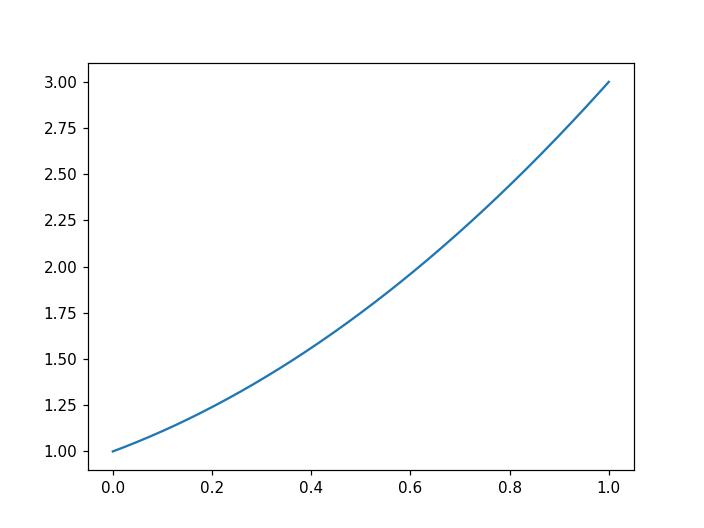

In [112]:
#aggiunge funzionalità ai grafici
%matplotlib notebook  
from matplotlib import pyplot as plt
# import  matplotlib.pyplot as plt
plt.plot(xData, yData)

plt.show()

In [113]:
# numpy version
xData = np.linspace(0,1,2000)
f = lambda x : x**2 + x + 1
yData = f(xData)

<IPython.core.display.Javascript object>


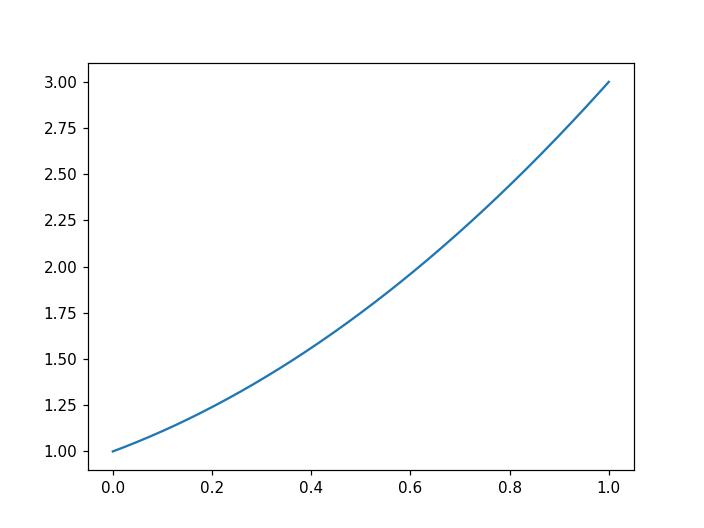

In [114]:
#aggiunge funzionalità ai grafici
%matplotlib notebook  
from matplotlib import pyplot as plt
# import  matplotlib.pyplot as plt
plt.plot(xData, yData)

plt.show()

<IPython.core.display.Javascript object>


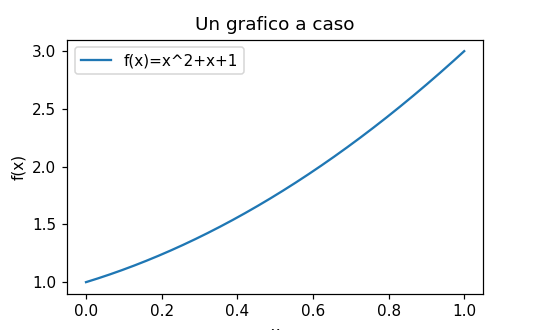

In [84]:
#aggiunge funzionalità ai grafici
%matplotlib notebook  
from matplotlib import pyplot as plt
# import  matplotlib.pyplot as plt
plt.plot(xData, yData,label="f(x)=x^2+x+1")  # label che viene mostrata dalla legenda
plt.ylabel('f(x)') # scriviamo 'f(x)' sull'asse delle y
plt.xlabel('x')    # scriviamo 'x' sull'asse delle x
plt.title('Un grafico a caso')
plt.legend()  # aggiungiamo la legenda 
plt.show()

<IPython.core.display.Javascript object>


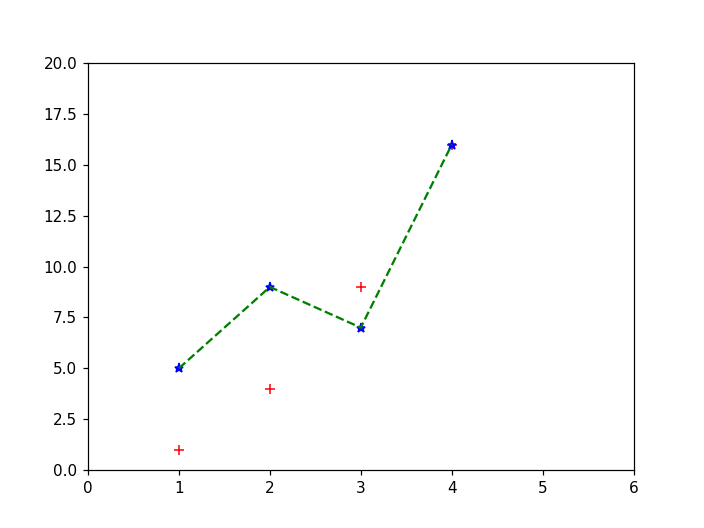

In [86]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'r+')   
plt.plot([1, 2, 3, 4], [5, 9, 7, 16], 'b*') 
plt.plot([1, 2, 3, 4], [5, 9, 7, 16], 'g--') 


plt.axis([0, 6, 0, 20]) # asse x in [0,6] e asse y in [0.20]

plt.show()


<IPython.core.display.Javascript object>


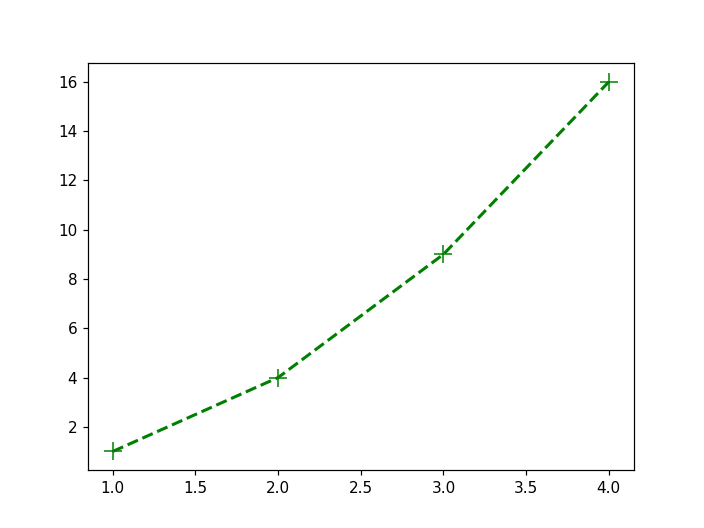

In [92]:
#plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'go--', linewidth=2, markersize=12)
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], color='green', marker='+', linestyle='dashed', linewidth=2, markersize=12)
plt.show()



#### Parametri per colori e tipo marker / linea

<IPython.core.display.Javascript object>


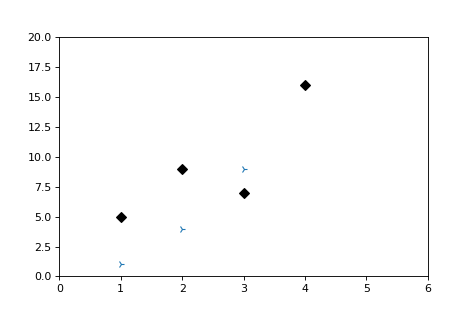

In [52]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], '4')   
plt.plot([1, 2, 3, 4], [5, 9, 7, 16], 'kD') 
plt.axis([0, 6, 0, 20]) # asse x in [0,6] e asse y in [0.20]

plt.show()

#### Scatter

<IPython.core.display.Javascript object>


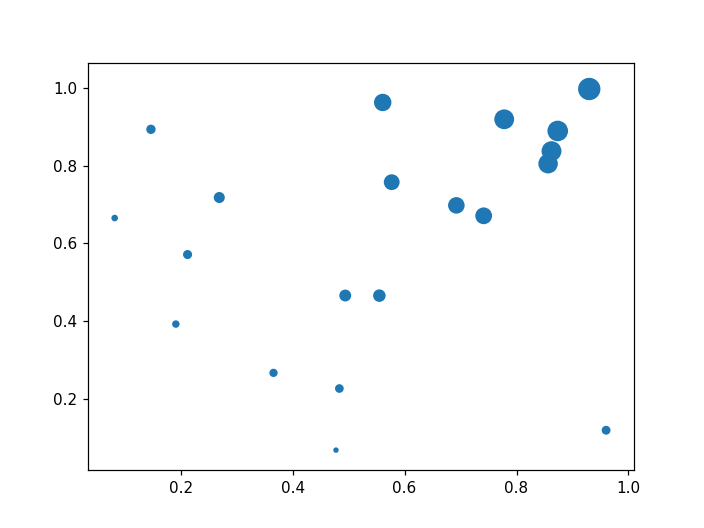

In [77]:
# creiamo dei dati
%matplotlib notebook  
import random
from matplotlib import pyplot as plt

x = [random.random() for i in range(20)]
y = [random.random() for i in range(20)]
f = lambda x,y: x*y
z = [200*f(xi,yi) for xi,yi in zip(x,y)]
plt.scatter(x, y, s=z)    # s è la size!

plt.show()

In [67]:
from matplotlib import pyplot as plt
M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3,4),skiprows = 1,converters = {4: lambda s: dic[s.decode("utf-8")]})
M_setosa = M[M[:,4]==0] 
plt.scatter(M[:,0], M[:,1],color="red")    # s è la size!

plt.show()

SyntaxError: invalid syntax (<ipython-input-67-b2751eae3f97>, line 3)

<IPython.core.display.Javascript object>


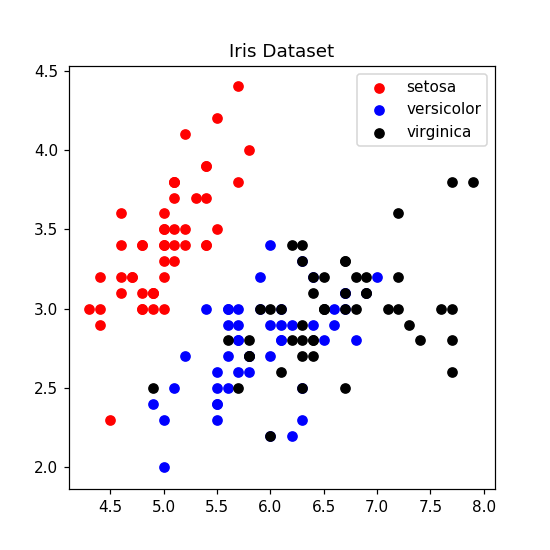

Text(0.5, 1.0, 'Iris Dataset')

In [75]:
%matplotlib notebook  
from matplotlib import pyplot as plt

M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3,4),skiprows = 1,converters = {4: lambda s: dic[s.decode("utf-8")]})
M_0 = M[M[:,4]==0] 
M_1 = M[M[:,4]==1]
M_2 = M[M[:,4]==2]

plt.figure(figsize = (5,5))
plt.scatter(M_0[:,0], M_0[:,1],color="red",label = "setosa")   
plt.scatter(M_1[:,0], M_1[:,1],color="blue",label = "versicolor")   
plt.scatter(M_2[:,0], M_2[:,1],color="k",label = "virginica")
plt.legend()
plt.title("Iris Dataset")

<IPython.core.display.Javascript object>


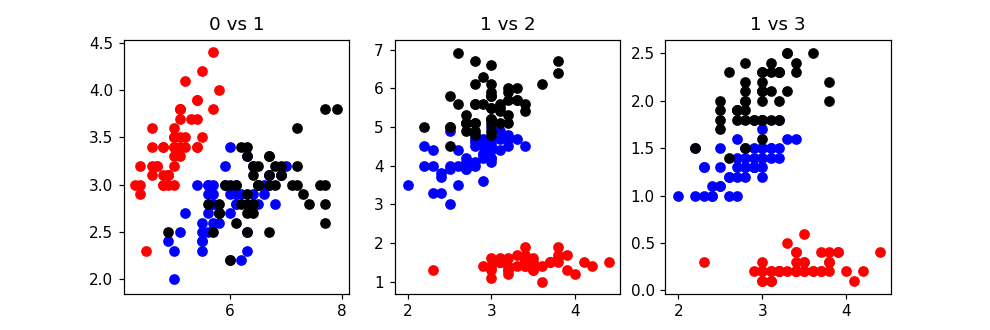

In [73]:
%matplotlib notebook  
from matplotlib import pyplot as plt

M = np.loadtxt("file/iris.data",delimiter=",",usecols=(0,1,2,3,4),skiprows = 1,converters = {4: lambda s: dic[s.decode("utf-8")]})
M_0 = M[M[:,4]==0] 
M_1 = M[M[:,4]==1]
M_2 = M[M[:,4]==2]

fig, axs = plt.subplots(1, 3, figsize=(9, 3))

axs[0].scatter(M_0[:,0], M_0[:,1],color="red")   
axs[0].scatter(M_1[:,0], M_1[:,1],color="blue")   
axs[0].scatter(M_2[:,0], M_2[:,1],color="k")
axs[0].set_title("0 vs 1")

axs[1].scatter(M_0[:,1], M_0[:,2],color="red")   
axs[1].scatter(M_1[:,1], M_1[:,2],color="blue")   
axs[1].scatter(M_2[:,1], M_2[:,2],color="k")   
axs[1].set_title("1 vs 2")

axs[2].scatter(M_0[:,1], M_0[:,3],color="red")   
axs[2].scatter(M_1[:,1], M_1[:,3],color="blue")   
axs[2].scatter(M_2[:,1], M_2[:,3],color="k")   
axs[2].set_title("1 vs 3")

plt.show()

#### Più grafici nella stessa finestra! 

<IPython.core.display.Javascript object>


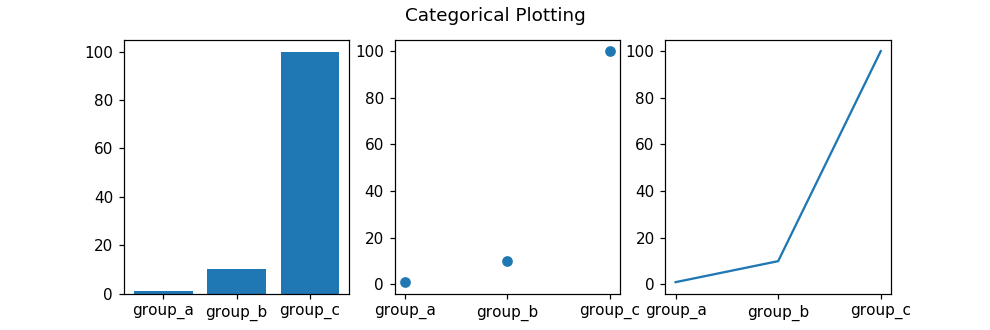

In [95]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')